**CNN:** is a deep learning model manily used for images and videos
#### Use Cases:
* Image Classification  (Pizza or Steak)
* Face Recognition
* Medical Imaging
* Video Classification (action detection , surveillance)
* Self Driving Cars

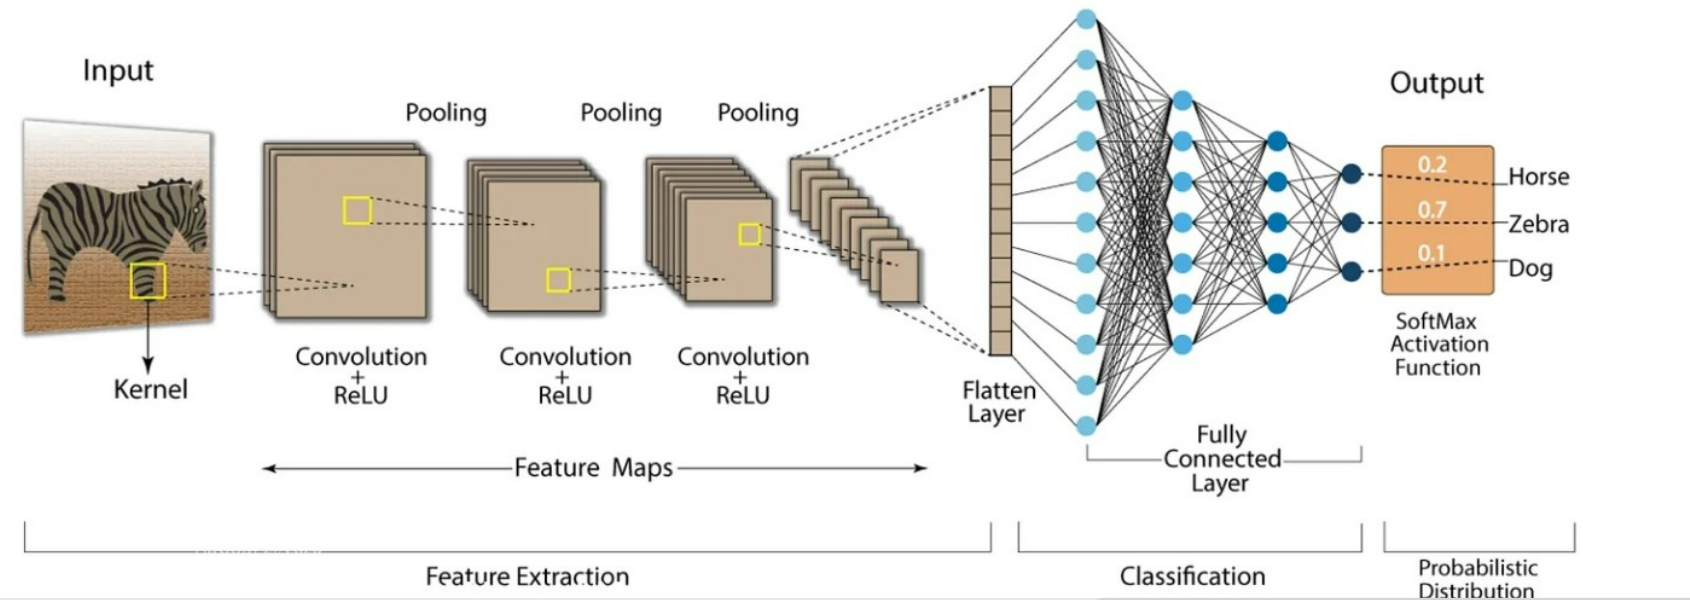

* 1. Convolutional Layer:Detect Edges and Patterns
* 2. ReLU: Keep Positive values
* 3. Pooling: Reduce Image Size
* 4. Flatten Layer: Converts to 1D
* 5. Dense Layer: Final Decision for example in above image (0.2-Horse,0.1-Dog,0.7 Zebra)


In [53]:
# Import all Required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import zipfile
import os
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential




In [2]:
print(tf.__version__)

2.19.0


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 87% 142M/163M [00:00<00:00, 1.49GB/s]
100% 163M/163M [00:00<00:00, 1.38GB/s]


In [4]:
with zipfile.ZipFile('/content/face-mask-dataset.zip','r') as zip_ref:
  zip_ref.extractall('/content')

In [5]:
base_dir = 'data'
os.listdir(base_dir)

['with_mask', 'without_mask']

In [6]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [7]:
training_data=datagen.flow_from_directory(base_dir,target_size=(224,224),batch_size=32,class_mode='binary',
                                          subset='training',seed=42)

Found 6043 images belonging to 2 classes.


In [8]:
testing_data=datagen.flow_from_directory(base_dir,target_size=(224,224),batch_size=32,
                                         class_mode='binary',subset='validation',seed=42)

Found 1510 images belonging to 2 classes.


In [9]:
#Create Model and Add Layers
model=Sequential(
    [
        Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
        MaxPooling2D(2,2),
        Conv2D(32,3,activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,3,activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(512,activation='relu'),
        Dropout(0.3),
        Dense(1,activation='sigmoid')
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    22,151,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,175,777 (84.59 MB)

 Trainable params: 22,175,777 (84.59 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training
model.fit(training_data,epochs=10,validation_data=testing_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 55/189 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.6348 - loss: 0.8764

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 27s 110ms/step - accuracy: 0.7594 - loss: 0.5687 - val_accuracy: 0.9232 - val_loss: 0.2369
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.9100 - loss: 0.2210 - val_accuracy: 0.9351 - val_loss: 0.1955
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.9458 - loss: 0.1453 - val_accuracy: 0.9119 - val_loss: 0.2388
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9634 - loss: 0.1018 - val_accuracy: 0.9146 - val_loss: 0.2814
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9752 - loss: 0.0777 - val_accuracy: 0.9444 - val_loss: 0.2068
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9807 - loss: 0.0514 - val_accuracy: 0.9351 - val_loss: 0.2957
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.9866 - loss: 0.0388 - val_accuracy: 0.9517 - val_loss: 0.2488
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.9923 - loss: 0.0208 - val_accura

In [15]:

loss,accuracy=model.evaluate(testing_data)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9262 - loss: 0.4220
Loss: 0.4048096835613251
Accuracy: 0.9291390776634216


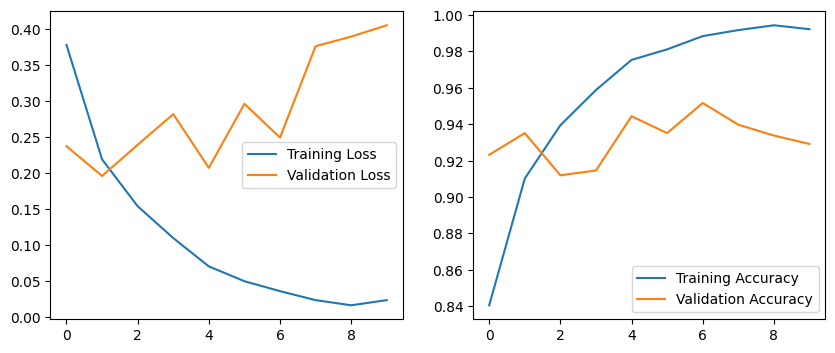

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(model.history.history['loss'],label='Training Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(model.history.history['accuracy'],label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


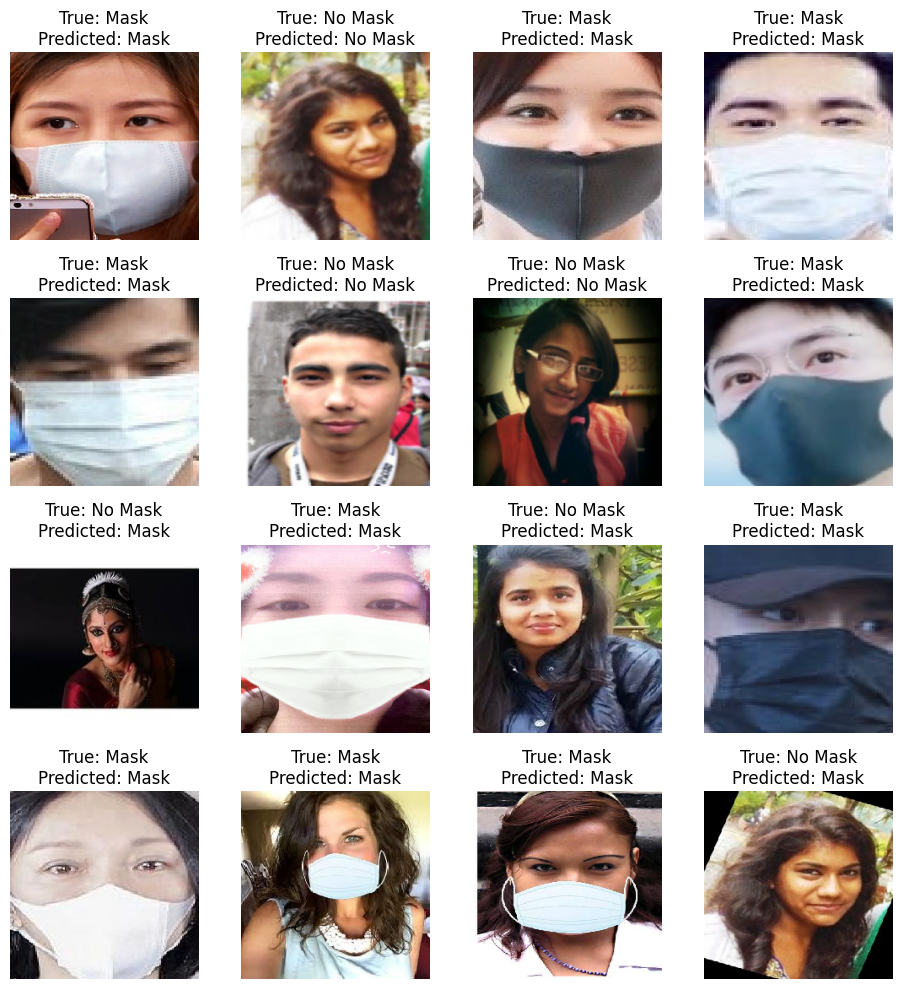

In [18]:
# prediction
image,label=next(testing_data)
prediction=model.predict(image)
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(image[i])
  plt.axis('off')
  true_label='Mask' if label[i]==0 else 'No Mask'
  pred_label='Mask' if prediction[i]<0.5 else 'No Mask'
  plt.title(f'True: {true_label}\nPredicted: {pred_label}')
  plt.tight_layout()
plt.show()


Saving m1.jpg to m1 (4).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
Prediction: Mask


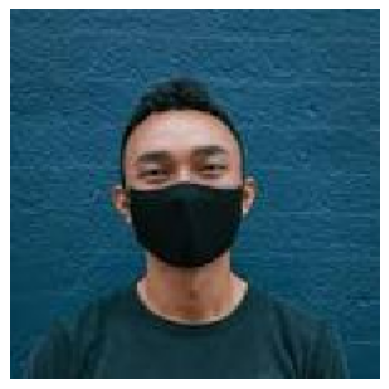

In [42]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  img_path='/content/'+fn
  img=tf.keras.preprocessing.image.load_img(img_path,target_size=(224,224))
  x=tf.keras.preprocessing.image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  x/=255.0
  prediction=model.predict(x)[0][0]
  label='Mask' if prediction<0.5 else 'No Mask'
  print(f'Prediction: {label}')
  plt.imshow(img)
  plt.axis('off')
  plt.show()

**Same Example One More time**

In [28]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input
from tensorflow.keras.models import Sequential

In [30]:
model=Sequential(
    [   Input(shape=(224,224,3)),
        Conv2D(16,3,activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(32,3,activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,3,activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(512,activation='relu'),
        Dropout(0.3),
        Dense(1,activation='sigmoid')
    ]
)

In [31]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
#Train the model
model.fit(training_data,epochs=10,validation_data=testing_data)

Epoch 1/10
155/189 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7878 - loss: 0.7487

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.7997 - loss: 0.6871 - val_accuracy: 0.9119 - val_loss: 0.2335
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - accuracy: 0.8903 - loss: 0.2556 - val_accuracy: 0.9265 - val_loss: 0.1934
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.9308 - loss: 0.1736 - val_accuracy: 0.9285 - val_loss: 0.1998
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.9581 - loss: 0.1043 - val_accuracy: 0.9384 - val_loss: 0.2017
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.9697 - loss: 0.0906 - val_accuracy: 0.8490 - val_loss: 0.5298
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9649 - loss: 0.0990 - val_accuracy: 0.9417 - val_loss: 0.2627
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.9794 - loss: 0.0502 - val_accuracy: 0.9391 - val_loss: 0.2641
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.9884 - loss: 0.0339 - val_accurac

In [33]:
loss,accuracy=model.evaluate(testing_data)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9414 - loss: 0.4177
Loss: 0.3904160261154175
Accuracy: 0.9410595893859863


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


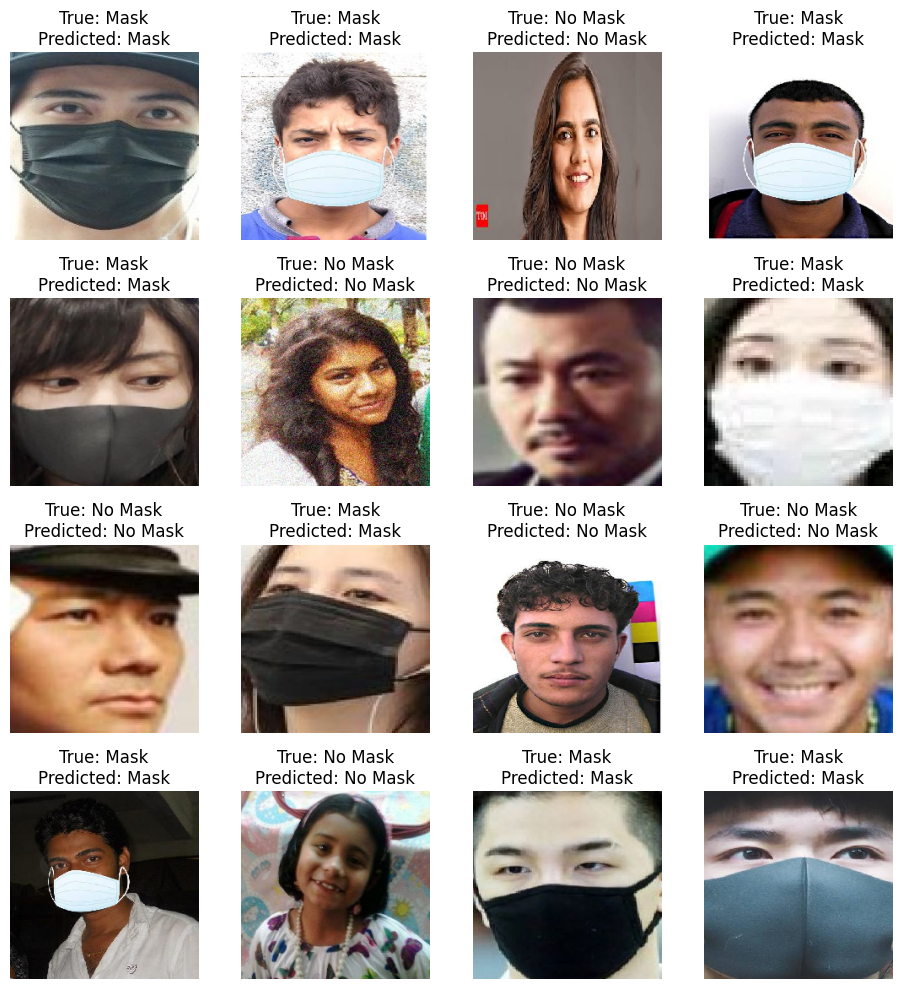

In [35]:
image,label=next(testing_data)
prediction=model.predict(image)
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(image[i])
  plt.axis('off')
  true_label='Mask' if label[i]==0 else 'No Mask'
  pred_label='Mask' if prediction[i]<0.5 else 'No Mask'
  plt.title(f'True: {true_label}\nPredicted: {pred_label}')
  plt.tight_layout()
plt.show()

Saving m2.jpg to m2 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Mask


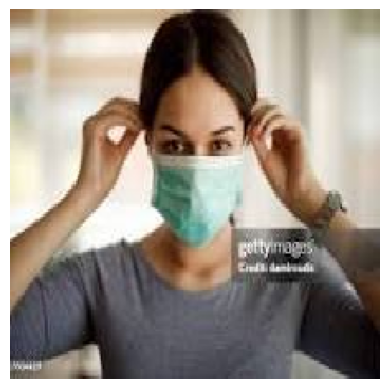

In [55]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  img_path='/content/'+fn
  img=image.load_img(img_path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  x/=255.0
  prediction=model.predict(x)[0][0]
  label='Mask' if prediction<0.5 else 'No Mask'
  print(f'Prediction: {label}')
  plt.imshow(img)
  plt.axis('off')
  plt.show()